
# Programa Ingenia+ Data Science

<font size=5> 🚀 👩🏽‍💻 Machine Learning: Aprendizaje Supervisado 📣</font>

## Predicción de la producción de energía por fuente


## Introducción

En este estudio, vamos a leer los datos limpios y procesados para crear un modelo de aprendizaje automático que pueda predecir la producción de energía por fuente de energía individual.

## Procedimiento

1. Cargaremos los datos.
2. Seleccionaremos una de las columnas de fuente de energía.
3. Repetiremos el modelo para cada una de las siguientes fuentes de energía:
    * Eólico
    * Hidroeléctrico (<50 MW)

## Resultados

Al repetir el modelo para cada fuente de energía, podremos obtener una mejor comprensión de la producción de energía por fuente.

En este caso trabajamos con la **energía solar**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
# Leemos los datos de energía
er_limpio_solar = pd.read_csv('../Datos/er_SOLAR.csv')
er_limpio_solar.head()

,anio,mes,region,prov,SOLAR,energia_gen
0,2011,1,CUYO,SAN JUAN,True,0.0
1,2011,2,CUYO,SAN JUAN,True,0.0
2,2011,3,CUYO,SAN JUAN,True,0.1
3,2011,4,CUYO,SAN JUAN,True,0.2
4,2011,5,CUYO,SAN JUAN,True,0.2


Ahora tenemos que decidir qué variable o variables vamos a predecir. Esto quiere decir que tenemos que elegir cuál va a ser la variable que, al predecirla, conteste la pregunta que nos hicimos de los datos.

En este caso, la pregunta es:

###  ¿Cuánta energía eléctrica se generará a partir de la fuente de energía solar?

**Etiquetas para variables categóricas**

LinearRegression no puede trabajar con variables categóricas, como el nombre de la provincia. Para poder utilizarlo debemos convertir estas variables en variables numéricas. Podemos hacer esto utilizando el método LabelEncoder de la biblioteca scikit-learn.

El método LabelEncoder asigna un entero único a cada categoría única de una variable categórica. Por ejemplo, si la variable "provincia" tiene las categorías "Buenos Aires", "Córdoba" y "Santa Fe", el método LabelEncoder asignaría los enteros 0, 1 y 2 a estas categorías, respectivamente.

Una vez que hemos convertido las variables categóricas en variables numéricas, podemos utilizar LinearRegression para predecir la producción de energía eléctrica.

In [3]:
# Leemos nuevamente los datos de energía con LabelEncoder
er_limpio_solar = pd.read_csv('../Datos/er_le_SOLAR.csv')
er_limpio_solar.head()

,anio,mes,region,prov,SOLAR,energia_gen
0,2011,1,3,14,True,0.0
1,2011,2,3,14,True,0.0
2,2011,3,3,14,True,0.1
3,2011,4,3,14,True,0.2
4,2011,5,3,14,True,0.2


### El escalado de los datos numéricos. ###

La variable a predecir es numérica, es por eso que vamos a escalarla, que en este caso es la energía generada.

Dos de las técanicas más populares para escalar dato numérico previo a la modelización son la normalización y la estandarización. Para la normalización utilizamos el método de **MinMax** que escala a la variable a un rango entre 0 y 1. Y para la estandarización utilizamos el método **StandardScaler** haciendo que la media de los datos sea 0 y su desviación estandar. 


**Método MinMax**

In [4]:
# _min_max_scaler
er_limpio_solar_min_max_scaler = er_limpio_solar.copy()

# Seleccionamos la columna 'energia_gen' para normalizar
energia_min_max_scaler = er_limpio_solar_min_max_scaler[['energia_gen']]

# Creamos el objeto MinMaxScaler
scaler_min_max_scaler = MinMaxScaler()

# Normalizamos los datos y se agrega como nueva columna
er_limpio_solar_min_max_scaler['energia_estimator'] = scaler_min_max_scaler.fit_transform(energia_min_max_scaler)

# Visualizamos
er_limpio_solar_min_max_scaler.head()

,anio,mes,region,prov,SOLAR,energia_gen,energia_estimator
0,2011,1,3,14,True,0.0,0.000000
1,2011,2,3,14,True,0.0,0.000000
2,2011,3,3,14,True,0.1,0.003067
3,2011,4,3,14,True,0.2,0.006135
4,2011,5,3,14,True,0.2,0.006135


**Método StandardScale**

In [5]:
# _standar_scaler
er_limpio_solar_standar_scaler = er_limpio_solar.copy()

# Seleccionamos la columna 'energia_gen' para normalizar
energia_standar_scaler = er_limpio_solar_standar_scaler[['energia_gen']]

# Creamos el objeto StandardScaler
scaler_standar_scaler = StandardScaler()

# Estandarizamos los datos y reemplazamos la columna original con los datos estandarizados
er_limpio_solar_standar_scaler['energia_estimator'] = scaler_standar_scaler.fit_transform(energia_standar_scaler)

# Visualizamos
er_limpio_solar_standar_scaler.head()

,anio,mes,region,prov,SOLAR,energia_gen,energia_estimator
0,2011,1,3,14,True,0.0,-0.578637
1,2011,2,3,14,True,0.0,-0.578637
2,2011,3,3,14,True,0.1,-0.563530
3,2011,4,3,14,True,0.2,-0.548423
4,2011,5,3,14,True,0.2,-0.548423


## 📈 Preparación de Modelos

La regresión es un tipo de aprendizaje automático que se utiliza para predecir una variable numérica continua. En este caso, queremos predecir la cantidad de energía generada. La regresión es una buena opción para este problema porque permite capturar la relación entre las variables explicativas y la variable a predecir.

## Seleccion de target (y) y variables (X)

Lo primero que haremos, es seleccionar las variables o features que deseemos usar como variables independientes (aquellas que van a explicar mi predicción) y la variable a predecir.

Usaremos todas las variables menos aquellas que fueron usadas para calcular el puntaje final. Debemos también asegurarnos de no incluir la variable a predecir. Como variable a predecir usaremos el puntaje final.

In [6]:
# Eliminamos aquellas variables que no quiero incluir en el modelo y las guardamos en x.
x = er_limpio_solar.drop(['energia_gen'],axis=1)

In [7]:
x.head()

,anio,mes,region,prov,SOLAR
0,2011,1,3,14,True
1,2011,2,3,14,True
2,2011,3,3,14,True
3,2011,4,3,14,True
4,2011,5,3,14,True


In [8]:
# Ahora seleccionamos la variable a predecir y la guardamos en y_min_max_scaler para el metodo MinMax
y_min_max_scaler = er_limpio_solar_min_max_scaler['energia_estimator']

# Visualizamos
y_min_max_scaler.head()

0    0.000000
1    0.000000
2    0.003067
3    0.006135
4    0.006135
Name: energia_estimator, dtype: float64

In [9]:
# Seleccionamos la variable a predecir y la guardamos en y_standar_scaler para el metodo Standar Scaler
y_standar_scaler = er_limpio_solar_standar_scaler['energia_estimator']

# Visualizamos
y_standar_scaler.head()

0   -0.578637
1   -0.578637
2   -0.563530
3   -0.548423
4   -0.548423
Name: energia_estimator, dtype: float64

In [10]:
x, y_min_max_scaler, y_standar_scaler = np.array(x), np.array(y_min_max_scaler) , np.array(y_standar_scaler)

### Separación Train / Test

**Separación de los datos en conjuntos de entrenamiento y testeo**

Para poder evaluar el rendimiento del modelo, necesitamos separar los datos en dos conjuntos: un conjunto de entrenamiento y un conjunto de testeo.

El conjunto de entrenamiento se utilizará para entrenar el modelo. El modelo no verá los datos del conjunto de testeo hasta que esté completamente entrenado.

La función `train_test_split` de scikit-learn nos permite separar los datos en dos conjuntos. Por defecto, la función divide los datos en un 80% de entrenamiento y un 20% de testeo.

In [11]:
# Importamos la librearia para separar el dataset.
from sklearn.model_selection import train_test_split

In [12]:
x_min_max_scaler_train, x_min_max_scaler_test, y_min_max_scaler_train, y_min_max_scaler_test = train_test_split(x, y_min_max_scaler, test_size=0.2,random_state=42)
x_standar_scaler_train, x_standar_scaler_test, y_standar_scaler_train, y_standar_scaler_test = train_test_split(x, y_standar_scaler, test_size=0.2,random_state=42)

In [13]:
print(f"Tamaño de x_min_max_scaler_train: {x_min_max_scaler_train.shape}, Tamaño de x_min_max_scaler_test: {x_min_max_scaler_test.shape}")
print(f"Tamaño de x_standar_scaler_train: {x_standar_scaler_train.shape}, Tamaño de x_standar_scaler_test: {x_standar_scaler_test.shape}")

Tamaño de x_min_max_scaler_train: (1860, 5), Tamaño de x_min_max_scaler_test: (466, 5)
Tamaño de x_standar_scaler_train: (1860, 5), Tamaño de x_standar_scaler_test: (466, 5)


## 👩🏼‍💻 Desarrollo de Modelos

### Regresión Lineal
El modelo que vamos a utilizar es una regresión lineal. Es un tipo de modelo de aprendizaje automático que intenta encontrar una relación lineal entre las variables independientes y la variable dependiente.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
# Iniciamos el modelo para MinMax
regresor_linear_regression_y_min_max_scaler = LinearRegression()
# Entrenamos el modelo para MinMax
regresor_linear_regression_y_min_max_scaler.fit(x_min_max_scaler_train, y_min_max_scaler_train)
# Realizamos predicciones para MinMax
y_pred_linear_regression_y_min_max_scaler = regresor_linear_regression_y_min_max_scaler.predict(x)

In [16]:
# Iniciamos el modelo para Standar Scaler
regresor_linear_regression_y_standar_scaler = LinearRegression()
# Entrenamos el modelo para Standar Scaler
regresor_linear_regression_y_standar_scaler.fit(x_standar_scaler_train, y_standar_scaler_train)
# Realizamos predicciones para Standar Scaler
y_pred_linear_regression_y_standar_scaler = regresor_linear_regression_y_standar_scaler.predict(x)

### Random Forest

Random Forest es un algoritmo de ensamble. Hay dos tecnicas para esto: Bagging y Boosting.
El objetivo de bagging es entrenar distintos modelos, donde cada uno vea distintas porciones del set de entrenamiento. Random Forest, además de aplicar Bagging, también selecciona features al azar, de esa manera descorrelaciona aún más los distintos modelos de árbol creados.

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [18]:
# Iniciamos el modelo para MinMax
regresor_random_forest_y_min_max_scaler = RandomForestRegressor(criterion='absolute_error', random_state=42)
# Entrenamos el modelo para MinMax
regresor_random_forest_y_min_max_scaler.fit(x_min_max_scaler_train, y_min_max_scaler_train)

RandomForestRegressor(criterion='absolute_error', random_state=42)

In [19]:
# Realizamos predicciones para MinMax
y_pred_random_forest_y_min_max_scaler = regresor_random_forest_y_min_max_scaler.predict(x)

In [20]:
# Iniciamos el modelo para Standar Scaler
regresor_random_forest_y_standar_scaler = RandomForestRegressor(criterion='absolute_error', random_state=42)
# Entrenamos el modelo para Standar Scaler
regresor_random_forest_y_standar_scaler.fit(x_standar_scaler_train, y_standar_scaler_train)

RandomForestRegressor(criterion='absolute_error', random_state=42)

In [21]:
# Realizamos predicciones para Standar Scaler
y_pred_random_forest_y_standar_scaler = regresor_random_forest_y_standar_scaler.predict(x)

In [22]:
# Determinamos parámetros del regresor MinMax
regresor_random_forest_y_min_max_scaler.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [23]:
# Determinamos parámetros del regresor Standar Scaler
regresor_random_forest_y_standar_scaler.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### Support Vector Machine

El SVM es un algoritmo que establece un hiperplano que separa los puntos maximizando el margen. Una de sus ventajas es la aplicación de kernels, que permite ajustar mejor el modelo.


In [24]:
from sklearn.svm import SVR

In [25]:
# Iniciamos el modelo para MinMax
regresor_svr_y_min_max_scaler = SVR(C=1.0, epsilon=0.2)
# Entrenamos el modelo para MinMax
regresor_svr_y_min_max_scaler.fit(x_min_max_scaler_train, y_min_max_scaler_train);
# Realizamos predicciones para MinMax
y_pred_svr_y_min_max_scaler = regresor_svr_y_min_max_scaler.predict(x)

In [26]:
# Iniciamos el modelo para Standar Scaler
regresor_svr_y_standar_scaler = SVR(C=1.0, epsilon=0.2)
# Entrenamos el modelo para Standar Scaler
regresor_svr_y_standar_scaler.fit(x_standar_scaler_train, y_standar_scaler_train);
# Realizamos predicciones para Standar Scaler
y_pred_svr_y_standar_scaler = regresor_svr_y_standar_scaler.predict(x)

In [27]:
# Determinamos parámetros del regresor svr para MinMax
regresor_svr_y_min_max_scaler.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.2,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [28]:
# Determinamos parámetros del regresor svr para Standar Scaler
regresor_svr_y_standar_scaler.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.2,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## 📊 Evaluación de los modelos según distintas métricas

### Predicción en el conjunto de prueba

Para evaluar el desempeño de nuestros modelos, necesitamos calcular los errores. Para ello, podemos crear unas funciones que nos permitan obtener los errores fácilmente y graficar los resultados.

In [29]:
# Predecimos los valores del set de testeo para Regresion Lineal MinMas
y_pred_linear_regression_y_min_max_scaler = regresor_linear_regression_y_min_max_scaler.predict(x_min_max_scaler_test)
# Predecimos los valores del set de testeo para Regresion Lineal Standar Scaler
y_pred_linear_regression_y_standar_scaler = regresor_linear_regression_y_standar_scaler.predict(x_standar_scaler_test)
# Predecimos los valores del set de testeo para Random Forest MinMas
y_pred_random_forest_y_min_max_scaler = regresor_random_forest_y_min_max_scaler.predict(x_min_max_scaler_test)
# Predecimos los valores del set de testeo para Random Forest Standar Scaler
y_pred_random_forest_y_standar_scaler = regresor_random_forest_y_standar_scaler.predict(x_standar_scaler_test)
# Predecimos los valores del set de testeo para SVR MinMas
y_pred_svr_y_min_max_scaler = regresor_svr_y_min_max_scaler.predict(x_min_max_scaler_test)
# Predecimos los valores del set de testeo para SVR Standar Scaler
y_pred_svr_y_standar_scaler = regresor_svr_y_standar_scaler.predict(x_standar_scaler_test)

### Error medio absoluto

In [30]:
# Calculamos el error medio absoluto para Regresion Lineal MinMax
mae_linear_regression_y_min_max_scaler = mean_absolute_error(y_min_max_scaler_test, y_pred_linear_regression_y_min_max_scaler)
# Calculamos el error medio absoluto para Regresion Lineal Standar Scaler
mae_linear_regression_y_standar_scaler = mean_absolute_error(y_standar_scaler_test, y_pred_linear_regression_y_standar_scaler)
# Calculamos el error medio absoluto para Random Forest MinMax
mae_random_forest_y_min_max_scaler = mean_absolute_error(y_min_max_scaler_test, y_pred_random_forest_y_min_max_scaler)
# Calculamos el error medio absoluto para Random Forest Standar Scaler
mae_random_forest_y_standar_scaler = mean_absolute_error(y_standar_scaler_test, y_pred_random_forest_y_standar_scaler)
# Calculamos el error medio absoluto para SVR MinMax
mae_svr_y_min_max_scaler = mean_absolute_error(y_min_max_scaler_test, y_pred_svr_y_min_max_scaler)
# Calculamos el error medio absoluto para SVR Standar Scaler
mae_svr_y_standar_scaler = mean_absolute_error(y_standar_scaler_test, y_pred_svr_y_standar_scaler)

### Error Medio Cuadrado

In [31]:
# Calculamos el error medio cuadrado para Regresion Lineal MinMax
mse_linear_regression_y_min_max_scaler = mean_squared_error(y_min_max_scaler_test, y_pred_linear_regression_y_min_max_scaler)
# Calculamos el error medio cuadrado para Regresion Lineal Standar Scaler
mse_linear_regression_y_standar_scaler = mean_squared_error(y_standar_scaler_test, y_pred_linear_regression_y_standar_scaler)
# Calculamos el error medio cuadrado para Random Forest MinMax
mse_random_forest_y_min_max_scaler = mean_squared_error(y_min_max_scaler_test, y_pred_random_forest_y_min_max_scaler)
# Calculamos el error medio cuadrado para Random Forest Standar Scaler
mse_random_forest_y_standar_scaler = mean_squared_error(y_standar_scaler_test, y_pred_random_forest_y_standar_scaler)
# Calculamos el error medio cuadrado para SVR MinMax
mse_svr_y_min_max_scale = mean_squared_error(y_min_max_scaler_test, y_pred_svr_y_min_max_scaler)
# Calculamos el error medio cuadrado para SVR Standar Scaler
mse_svr_y_standar_scaler = mean_squared_error(y_standar_scaler_test, y_pred_svr_y_standar_scaler)

### Coeficiente de determinacion

In [32]:
#Calculamos el coeficiente de determinación para Regresion Lineal MinMax
r2_linear_regression_y_min_max_scaler = r2_score(y_min_max_scaler_test, y_pred_linear_regression_y_min_max_scaler)
#Calculamos el coeficiente de determinación para Regresion Lineal Standar Scaler
r2_linear_regression_y_standar_scaler = r2_score(y_standar_scaler_test, y_pred_linear_regression_y_standar_scaler)
#Calculamos el coeficiente de determinación para Random Forest MinMax
r2_random_forest_y_standar_scaler = r2_score(y_standar_scaler_test, y_pred_random_forest_y_standar_scaler)
#Calculamos el coeficiente de determinación para Random Forest Standar Scaler
r2_random_forest_y_min_max_scaler = r2_score(y_standar_scaler_test, y_pred_random_forest_y_standar_scaler)
#Calculamos el coeficiente de determinación para SVR MinMax
r2_svr_y_min_max_scale = r2_score(y_min_max_scaler_test, y_pred_svr_y_min_max_scaler)
#Calculamos el coeficiente de determinación para SVR Standar Scaler
r2_svr_y_standar_scaler = r2_score(y_standar_scaler_test, y_pred_svr_y_standar_scaler)

### Comparación de metricas

In [33]:
#Comparamos las métricas mae
print(f"MAE linear regression y MinMax scaler: {mae_linear_regression_y_min_max_scaler}")
print(f"MAE linear regression y StandardScaler: {mae_linear_regression_y_standar_scaler}")
print(f"MAE random forest y MinMax scaler: {mae_random_forest_y_min_max_scaler}")
print(f"MAE random forest y StandardScaler: {mae_random_forest_y_standar_scaler}")
print(f"MAE svr y MinMax scaler: {mae_svr_y_min_max_scaler}")
print(f"MAE svr y StandardScaler: {mae_svr_y_standar_scaler}")

MAE linear regression y MinMax scaler: 0.11542078316432224
MAE linear regression y StandardScaler: 0.568445596195554
MAE random forest y MinMax scaler: 0.06815434187314041
MAE random forest y StandardScaler: 0.33509516315711857
MAE svr y MinMax scaler: 0.1786426704347987
MAE svr y StandardScaler: 0.5235273108160509


In [34]:
#Comparamos las métricas mse
print(f"MSE linear regression y MinMax scaler: {mse_linear_regression_y_min_max_scaler}")
print(f"MSE linear regression y StandarScaler: {mse_linear_regression_y_standar_scaler}")
print(f"MSE random forest y MinMax scaler: {mse_random_forest_y_min_max_scaler}")
print(f"MSE random forest y StandardScaler: {mse_random_forest_y_standar_scaler}")
print(f"MSE svr y MinMax scaler: {mse_svr_y_min_max_scale}")
print(f"MSE svr y StandardScaler: {mse_svr_y_standar_scaler}")

MSE linear regression y MinMax scaler: 0.027293162500233878
MSE linear regression y StandarScaler: 0.6620086132207404
MSE random forest y MinMax scaler: 0.018279365076248145
MSE random forest y StandardScaler: 0.4428835352797319
MSE svr y MinMax scaler: 0.042481787510920896
MSE svr y StandardScaler: 0.915913267132385


In [35]:
#Comparamos las métricas r2
print(f"R2 linear regression y MinMax scaler: {r2_linear_regression_y_min_max_scaler}")
print(f"R2 linear regression y StandardScaler: {r2_linear_regression_y_standar_scaler}")
print(f"R2 random forest y StandardScaler: {r2_random_forest_y_standar_scaler}")
print(f"R2 random forest y MinMax scaler: {r2_random_forest_y_min_max_scaler}")
print(f"R2 svr y MinMax scaler: {r2_svr_y_min_max_scale}")
print(f"R2 svr y StandardScaler: {r2_svr_y_standar_scaler}")

R2 linear regression y MinMax scaler: 0.20339455323864797
R2 linear regression y StandardScaler: 0.20339455323865063
R2 random forest y StandardScaler: 0.4670712292271675
R2 random forest y MinMax scaler: 0.4670712292271675
R2 svr y MinMax scaler: -0.23991579645883743
R2 svr y StandardScaler: -0.10213293722714067


Un r2 negativo significa que el modelo es realmente inapropiado para los datos y que las predicciones son peores que simplemente usar la media de los valores observados como predicción. Esto puede ocurrir cuando el modelo tiene un rendimiento muy deficiente y está realizando predicciones extremadamente alejadas de los valores reales.

## 💻 Gráfico de resultados

Graficamos un Scatterplot mostrando la relación entre el valor real y el predicho

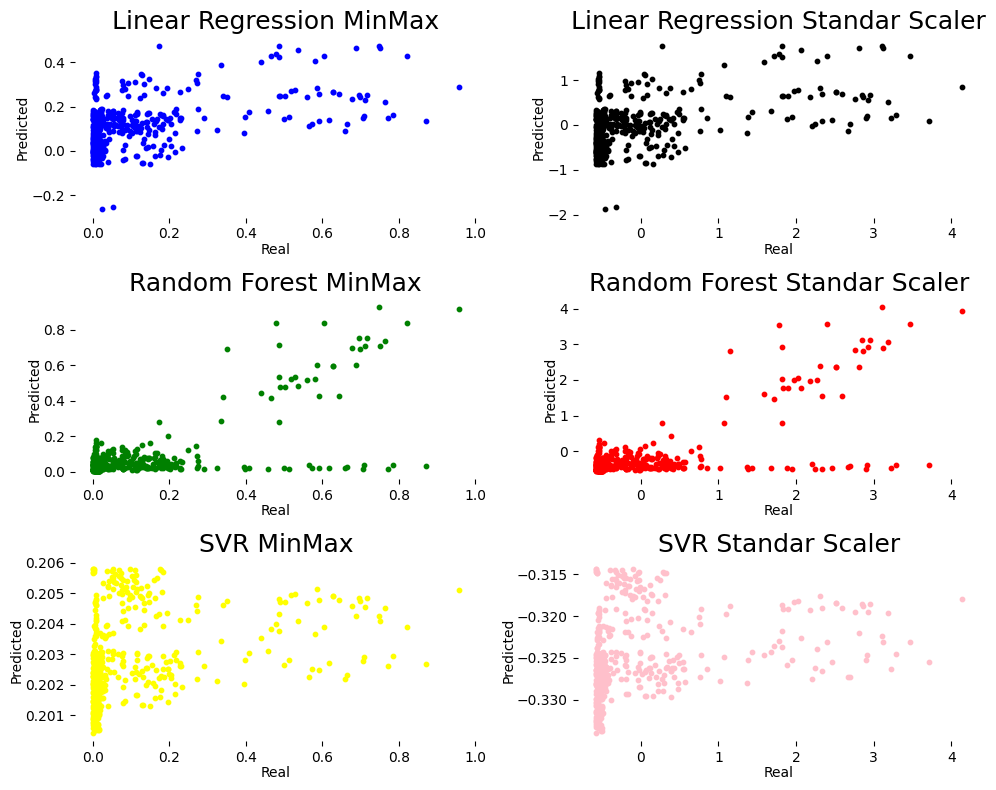

In [36]:
def graph_real_pred(y_test, y_pred_train, color, title, ax=None):
    """
    Funcion que grafica los valores reales vs. predichos
    :param y_test: valores reales
    :param y_pred_train: valores predichos
    :param color: color para el plot.
    :param title: título del gráfico
    :param ax: objeto de ejes de Matplotlib para dibujar el gráfico (opcional)
    :return: Scatterplot mostrando la relación entre el valor real y el predicho
    """
    if ax is None:
        ax = plt.gca()
    
    ax.scatter(y_test, y_pred_train, c=color, s=10)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Real', size=10, labelpad=1)
    ax.set_ylabel('Predicted', size=10, labelpad=1)
    ax.set_title(title, size=18)  # Agregamos título al gráfico

#Generamos la figura. 
fig, axs = plt.subplots(3, 2, figsize=(10, 8))


graph_real_pred(y_min_max_scaler_test, y_pred_linear_regression_y_min_max_scaler,"blue","Linear Regression MinMax",ax=axs[0, 0] )
graph_real_pred(y_standar_scaler_test, y_pred_linear_regression_y_standar_scaler,"black","Linear Regression Standar Scaler", ax=axs[0, 1])
graph_real_pred(y_min_max_scaler_test, y_pred_random_forest_y_min_max_scaler,"green","Random Forest MinMax", ax=axs[1, 0])
graph_real_pred(y_standar_scaler_test, y_pred_random_forest_y_standar_scaler,"red","Random Forest Standar Scaler", ax=axs[1, 1])
graph_real_pred(y_min_max_scaler_test, y_pred_svr_y_min_max_scaler,"yellow","SVR MinMax", ax=axs[2, 0])
graph_real_pred(y_standar_scaler_test, y_pred_svr_y_standar_scaler,"pink","SVR Standar Scaler", ax=axs[2, 1])


plt.tight_layout()
plt.show()


Ambos modelos de **Random Forest** han mostrado los mejores comportamientos, por lo que a continuación serán los casos únicos casos a estudiar.

## 💪🏼 Determinación de los mejores hiperparámetros de Random Forest utilizando GridSearchCV

Para encontrar los mejores hiperparámetros de un modelo, podemos utilizar la herramienta GridSearchCV. GridSearchCV nos permite probar diferentes combinaciones de hiperparámetros y seleccionar la que proporciona el mejor rendimiento.

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
# Determinamos los valores para los parámetros a optimizar
param_grid_rf = {
    'criterion': ['absolute_error'],
    'n_estimators': [70, 80, 90, 100, 120],
    'max_features': ['log2','sqrt'],
    'max_depth': [None, 1, 3, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20, 50]
}

In [39]:
# Inicializamos un modelo
grid_regresor_min_max = RandomForestRegressor(random_state=42)
grid_regresor_standar_scaler = RandomForestRegressor(random_state=42)

In [40]:
# Creamos la búsqueda para MinMax
rf_search_min_max = GridSearchCV(estimator=grid_regresor_min_max, param_grid=param_grid_rf,
                         cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

In [41]:
rf_search_min_max

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['absolute_error'],
                         'max_depth': [None, 1, 3, 5, 10, 20, 50],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20, 50],
                         'n_estimators': [70, 80, 90, 100, 120]},
             scoring='neg_mean_absolute_error', verbose=2)

In [42]:
# Creamos la búsqueda para Standar Scaler
rf_search_standar_scaler = GridSearchCV(estimator=grid_regresor_standar_scaler, param_grid=param_grid_rf,
                         cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

In [43]:
rf_search_standar_scaler

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['absolute_error'],
                         'max_depth': [None, 1, 3, 5, 10, 20, 50],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20, 50],
                         'n_estimators': [70, 80, 90, 100, 120]},
             scoring='neg_mean_absolute_error', verbose=2)

In [44]:
# Corremos el gridsearch con una validación usando 3 folds para MinMax
rf_search_min_max.fit(x_min_max_scaler_train, y_min_max_scaler_train)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['absolute_error'],
                         'max_depth': [None, 1, 3, 5, 10, 20, 50],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20, 50],
                         'n_estimators': [70, 80, 90, 100, 120]},
             scoring='neg_mean_absolute_error', verbose=2)

In [45]:
# Corremos el gridsearch con una validación usando 3 folds para Standar Scaler
rf_search_standar_scaler.fit(x_standar_scaler_train, y_standar_scaler_train)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['absolute_error'],
                         'max_depth': [None, 1, 3, 5, 10, 20, 50],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20, 50],
                         'n_estimators': [70, 80, 90, 100, 120]},
             scoring='neg_mean_absolute_error', verbose=2)

### ¿Cuál es nuestro mejor estimador?

Para determinar cuál es nuestro mejor estimador, debemos evaluar el rendimiento de los diferentes estimadores que hemos probado. Podemos utilizar distintas métricas para evaluar el rendimiento, como el error medio absoluto (MAE), el error medio cuadrado (MSE) o el coeficiente de determinación (R²).

In [46]:
#Definimos la variable para MinMax
rf_best_min_max=rf_search_min_max.best_estimator_
rf_best_min_max

RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      max_features='log2', random_state=42)

In [47]:
#Definimos la variable para Standar Scaler
rf_best_standar_scaler=rf_search_standar_scaler.best_estimator_
rf_best_standar_scaler

RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      max_features='log2', n_estimators=120, random_state=42)

In [48]:
#Definimos los mejores parámetros para MinMax
best_params = rf_search_min_max.best_params_
print(best_params)

{'criterion': 'absolute_error', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 100}


In [49]:
#Definimos los mejores parámetros para Standar Scaler
rf_search_standar_scaler.best_params_

{'criterion': 'absolute_error',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 120}

In [50]:
#Definimos el mejor score para MinMax
rf_search_min_max.best_score_

-0.06837880137212217

In [51]:
#Definimos el mejor score para Standar Scaler
rf_search_standar_scaler.best_score_

-0.33692849364325295

### Interpretando la métrica MAE

El error absoluto medio (MAE) es una métrica de evaluación que mide la diferencia promedio entre las predicciones y los valores reales.

En el caso de GridSearchCV, la métrica MAE se multiplica por -1 para convertirla en una métrica de maximización. Esto significa que un valor negativo más alto indica un mejor rendimiento del modelo.

Por lo tanto, un valor de -0.06 indica que el error absoluto medio del modelo con los mejores hiperparámetros es de aproximadamente 0.06. Es decir, en promedio, las predicciones del modelo están a una distancia de aproximadamente 0.06 unidades del valor real.


In [52]:
# Entrenamos el modelo MinMax
rf_best_min_max.fit(x_min_max_scaler_train, y_min_max_scaler_train)

RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      max_features='log2', random_state=42)

In [53]:
# Entrenamos el modelo Standar Scaler
rf_best_standar_scaler.fit(x_standar_scaler_train, y_standar_scaler_train)

RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      max_features='log2', n_estimators=120, random_state=42)

In [54]:
# Hacemos la prediccion para el test de evaluación MinMax
predicciones_min_max = rf_best_min_max.predict(x_min_max_scaler_test)

In [55]:
# Hacemos la prediccion para el test de evaluación Standar Scaler
predicciones_standar_scaler = rf_best_standar_scaler.predict(x_standar_scaler_test)

In [56]:
#Calculamos el mse, r2 y mae  para ambos casos
mse_min_max = mean_squared_error(y_min_max_scaler_test, predicciones_min_max)
mse_standar = mean_squared_error(y_standar_scaler_test, predicciones_standar_scaler)
mae_min_max= mean_absolute_error(y_min_max_scaler_test,predicciones_min_max)
mae_standar=mean_absolute_error(y_standar_scaler_test,predicciones_standar_scaler)
r2_min_max = r2_score(y_min_max_scaler_test,predicciones_min_max)
r2_standar = r2_score(y_standar_scaler_test,predicciones_standar_scaler)

print(f"MSE MinMax: {mse_min_max}")
print(f"MSE StandardScaler: {mse_standar}")
print(f"MAE MinMax: {mae_min_max}")
print(f"MAE StandardScaler: {mae_standar}")
print(f"R2 MinMax: {r2_min_max}")
print(f"R2 StandardScaler: {r2_standar}")

MSE MinMax: 0.018112090339579816
MSE StandardScaler: 0.44185442494085553
MAE MinMax: 0.06755407593670187
MAE StandardScaler: 0.33494163155468293
R2 MinMax: 0.4713624770812356
R2 StandardScaler: 0.4683095739932257


### Correlacion

Para evaluar la correlación entre los valores reales y las predicciones, podemos crear un gráfico de dispersión real-predicción. En este caso evaluamos tanto para el método de Min-Max y Standar Scale. 

Un gráfico de dispersión real-predicción muestra los valores reales en el eje y y las predicciones en el eje x.


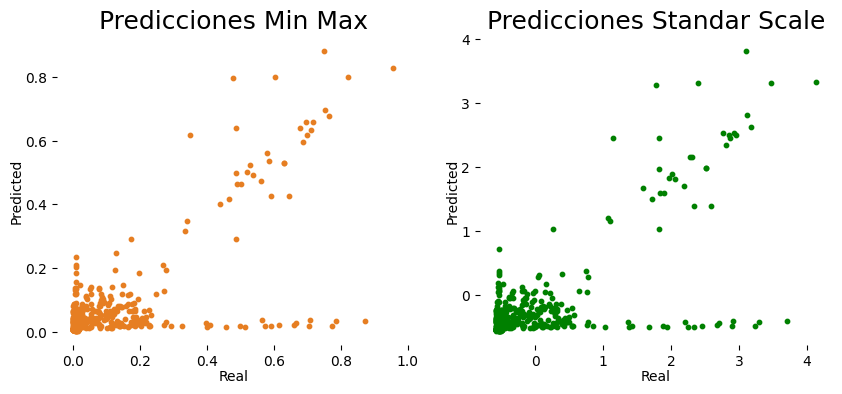

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
graph_real_pred(y_min_max_scaler_test, predicciones_min_max, color='#E67E22',title="Predicciones Min Max", ax=axs[0])
graph_real_pred(y_standar_scaler_test, predicciones_standar_scaler, color='green',title="Predicciones Standar Scale", ax=axs[1])

In [58]:
# Definimos la funcion que compara graficamente la importancia de las features
def feature_importance(model, feature_list, title, ax=None):
    """
    Function that gets and plots the feature importance
    for the given model
    :param model: the model to evaluaate
    :param feature_list: a list of features contained in the model

    :returns a plot with feature importance
    """
    if ax is None: 
        ax=plt.gca()
    
    # Obtiene la lista de importancias
    importances = list(model.feature_importances_)
    # Junta los nombres de los atributos y las importancias
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
    # Ordena por orden de importancia
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # Print la lista de importancias
    #[print('Variable: {} Importance: {}'.format(*pair)) for pair in feature_importances];
    # Colores
    colors = cm.rainbow(np.linspace(0, 1, len(feature_list)))

    # Caracteristicas en orden de importancia
    characteristics = [x[0] for x in feature_importances]
    # Obtiene las importancias
    importances_plot = [x[1] for x in feature_importances]
    # Grafica un bar plot
    ax.bar(characteristics, importances_plot, color=colors)
    # Personalizamos el grafico
    ax.set_xticks(list(range(len(characteristics))), characteristics, rotation = 90)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, size=14) 
    #ax.subplots_adjust(bottom=0.3);

### Importancia de las features

Podemos obtener la importancia de cada feature utilizando la función `feature_importance()`. Esta función toma como entrada el modelo y las columnas de las features.

En este caso, el modelo es `rf_best`, que es el modelo de Random Forest con los mejores hiperparámetros. Las columnas de los features son las columnas del DataFrame `er_limpio_solar`.

La salida de la función `feature_importance()` es un vector que contiene la importancia de cada feature. El valor más alto indica la feature más importante.

En particular en este análisis ya sea que se utilice el escalamiento Min-Max o StandardScaler los pesos son los mismos. 

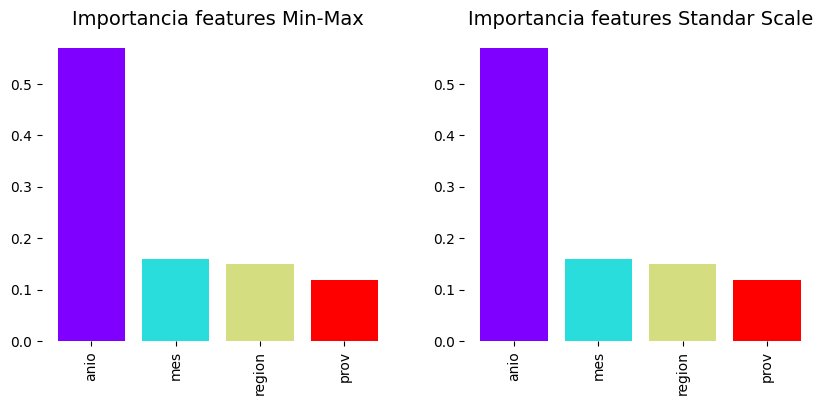

In [59]:
fig, axs=plt.subplots(1,2,figsize=(10,4))
columnas = ['prov', 'mes', 'region', 'anio']
feature_importance(rf_best_min_max, er_limpio_solar[columnas].columns,title='Importancia features Min-Max' , ax=axs[0])
# Buscamos la importancia de cada feature para Standar Scaler
feature_importance(rf_best_standar_scaler, er_limpio_solar[columnas].columns,title='Importancia features Standar Scale',  ax=axs[1])

### Análisis de residuos

Para analizar los residuos, podemos calcularlos y crear un gráfico de dispersión de residuos.

Los residuos son la diferencia entre los valores reales y los valores predichos por el modelo.

Un gráfico de dispersión de residuos muestra los residuos en el eje y y los valores predichos en el eje x.

Una línea recta que pase por el origen (0, 0) indica que los residuos son aleatorios.

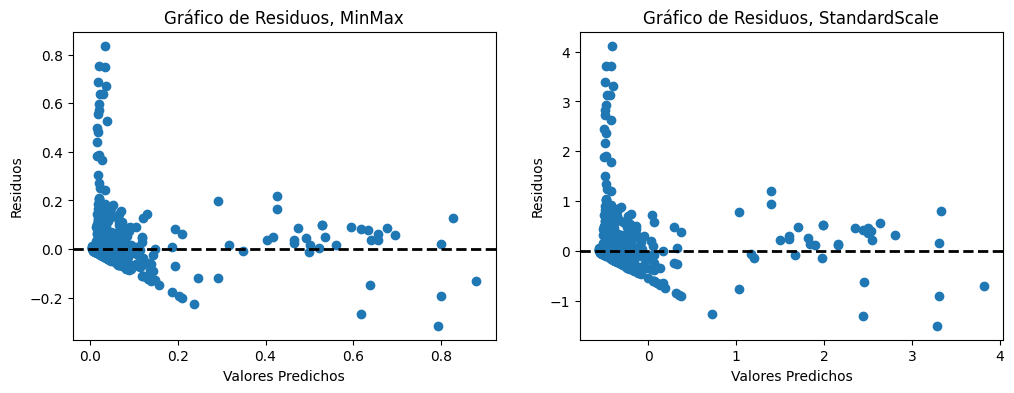

In [60]:
# Calcula los residuos para el caso de MinMax y StandarScaler. 
residuos_minmax = y_min_max_scaler_test- predicciones_min_max
residuos_standar=y_standar_scaler_test-predicciones_standar_scaler

fig, axs=plt.subplots(1,2, figsize=(12,4))
# Crea un gráfico de dispersión de residuos
axs[0].scatter(predicciones_min_max, residuos_minmax)
axs[0].axhline(y=0, color='black', linestyle='--', linewidth=2)  # Línea base en 0
axs[0].set_title('Gráfico de Residuos, MinMax')
axs[0].set_xlabel('Valores Predichos')
axs[0].set_ylabel('Residuos')

# Crea un gráfico de dispersión de residuos
axs[1].scatter(predicciones_standar_scaler, residuos_standar)
axs[1].axhline(y=0, color='black', linestyle='--', linewidth=2)  # Línea base en 0
axs[1].set_title('Gráfico de Residuos, StandardScale')
axs[1].set_xlabel('Valores Predichos')
axs[1].set_ylabel('Residuos')
plt.show()


### Gráfico Q-Q de residuos

Para evaluar la normalidad de los residuos, podemos utilizar un gráfico Q-Q.

Un gráfico Q-Q muestra los cuantiles de los residuos en el eje y y los cuantiles teóricos de una distribución normal en el eje x.

Si los residuos siguen una distribución normal, los puntos del gráfico Q-Q deberían seguir una línea recta.

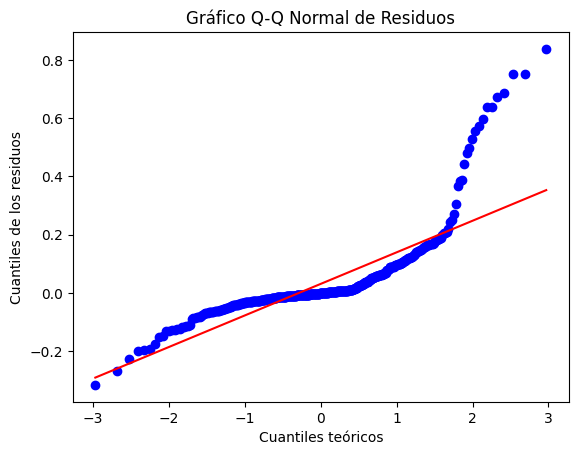

In [61]:
import scipy.stats as stats
# Calcula los cuantiles teóricos para una distribución normal
cuantiles_teoricos = stats.probplot(residuos_minmax, dist='norm', plot=plt)

# Personaliza el gráfico
plt.title('Gráfico Q-Q Normal de Residuos')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los residuos')
plt.show()

## Conclusiones

Cómo pudimos observar desde el inicio de este desarrollo, la regresión de random forest presentaba mejores resultados de las diferentes métricas: MAE, MSE y R2. Es por eso que con el método de GridSearch buscamos los mejores parámetros para optimizar las métricas y obtener un buen modelo sobre la energía solar generada. 

Probamos dos métodos de escalado del dato, MinMax y StandardScalar y dados a los resultados brindados cuando la variable numérica se escala con el primer método, las métricas arrojan mejores valores, por lo que el modelo de regresión con Random Forest, con los parámetros **criterion='absolute_error', max_depth=10, max_features='log2', random_state=42** y el escalado de MinMax  es nuestro modelo elegido. Este presenta los siguientes métricas: 

- MSE MinMax: 0.018112090339579816
- MAE MinMax: 0.06755407593670187
- R2 MinMax: 0.4713624770812356
